/var/folders/0h/31hzg3hj1tvbn37klk23hzk00000gn/T/ipykernel_44531/1118303886.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/var/folders/0h/31hzg3hj1tvbn37klk23hzk00000gn/T/ipykernel_44531/1118303886.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("/Users/winifred/Downloads/Cyclistic_Bike_Share_Project/visualisation/start_locations_by_rider_type.png", dpi=300)


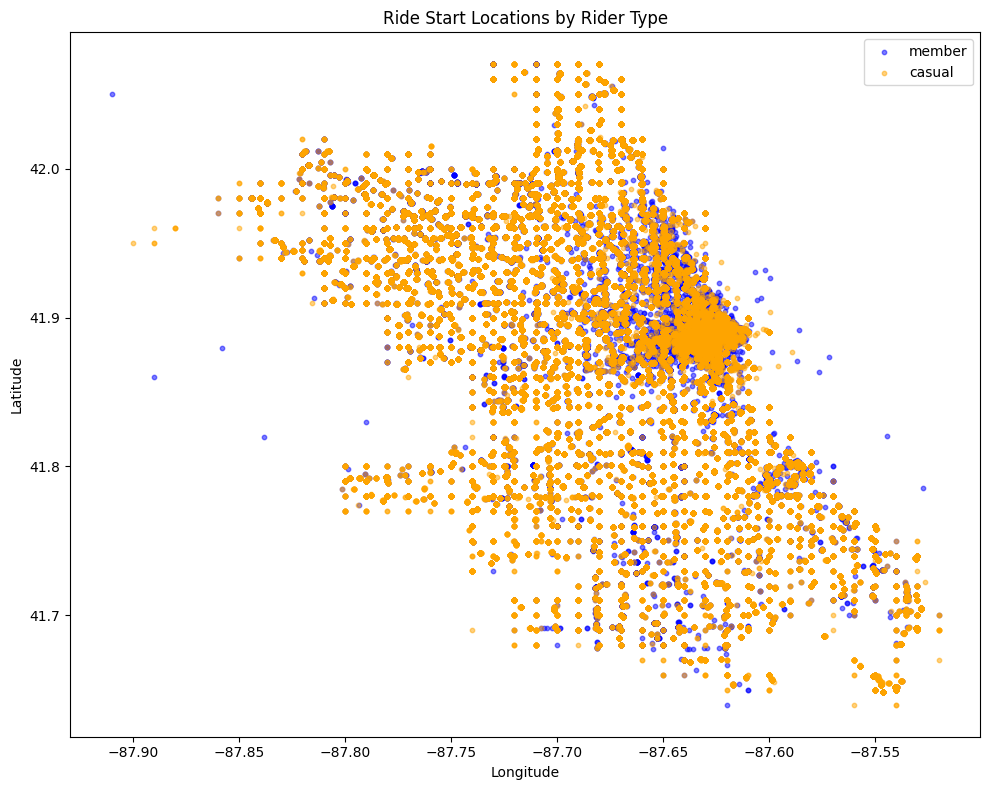

In [ ]:
import matplotlib.pyplot as plt

# Plot start locations, color by rider type
colors = {'member': 'blue', 'casual': 'orange'}
plt.figure(figsize=(10, 8))
for rider_type in df['member_casual'].unique():
    subset = df[df['member_casual'] == rider_type]
    plt.scatter(subset['start_lng'], subset['start_lat'], 
                c=colors[rider_type], label=rider_type, alpha=0.5, s=10)

plt.title('Ride Start Locations by Rider Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.savefig("/Users/winifred/Downloads/Cyclistic_Bike_Share_Project/visualisation/t start_locations_by_rider_type.png", dpi=300)
plt.show()


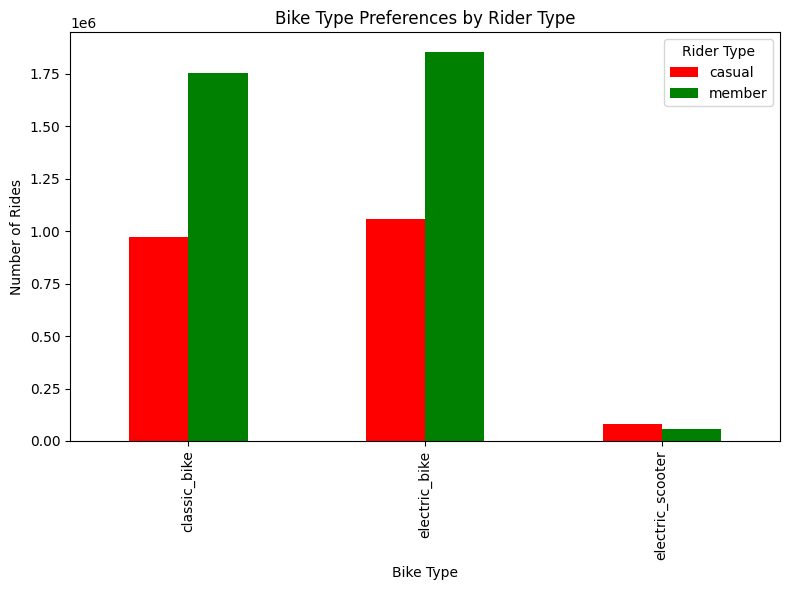

In [29]:
# Group by bike type and rider
bike_counts = df.groupby(['bike_type', 'member_casual'], observed=True).size().unstack()

# Plot
ax = bike_counts.plot(kind='bar', figsize=(8, 6), color=['Red', 'Green'])
plt.title('Bike Type Preferences by Rider Type')
plt.xlabel('Bike Type')
plt.ylabel('Number of Rides')
plt.legend(title='Rider Type')
plt.tight_layout()
plt.savefig("/Users/winifred/Downloads/Cyclistic_Bike_Share_Project/visualisation/bike_type_preferences.png", dpi=300)
plt.show()


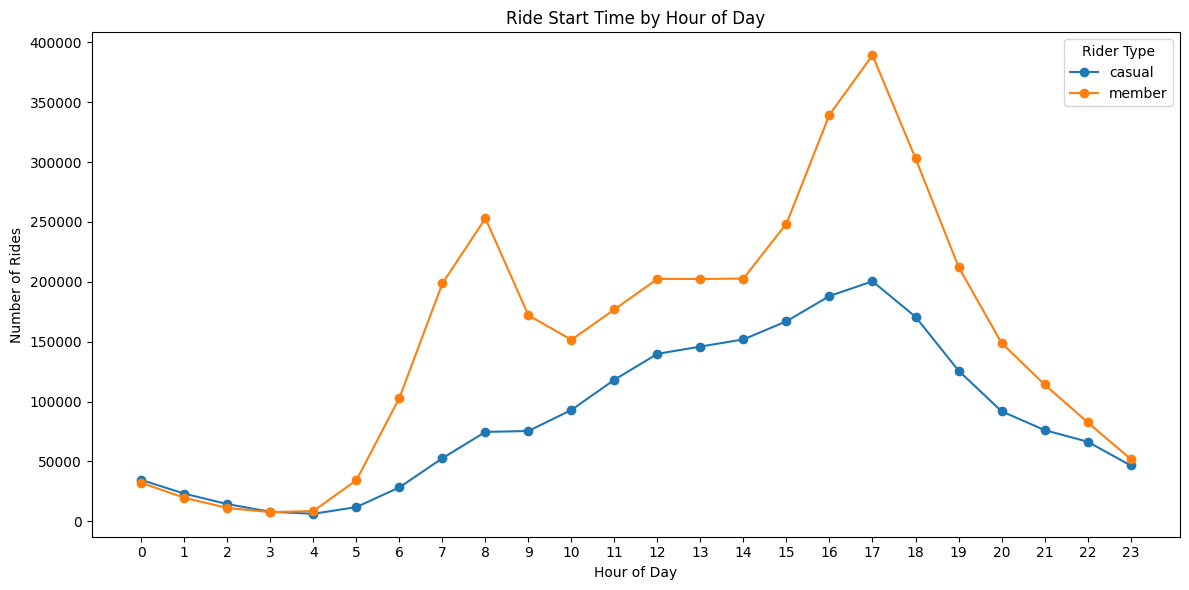

In [25]:
# Extract hour from ride start time

df['start_hour'] = df['ride_start_time'].apply(lambda x: x.hour)


# Group
hourly = df.groupby(['start_hour', 'member_casual'], observed=True).size().unstack().fillna(0)

# Plot
ax = hourly.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Ride Start Time by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.legend(title='Rider Type')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig("/Users/winifred/Downloads/Cyclistic_Bike_Share_Project/visualisation/hourly_ride_distribution.png", dpi=300)
plt.show()


/var/folders/0h/31hzg3hj1tvbn37klk23hzk00000gn/T/ipykernel_44531/1005625026.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='member_casual', y='ride_length', palette=['skyblue', 'Green'])


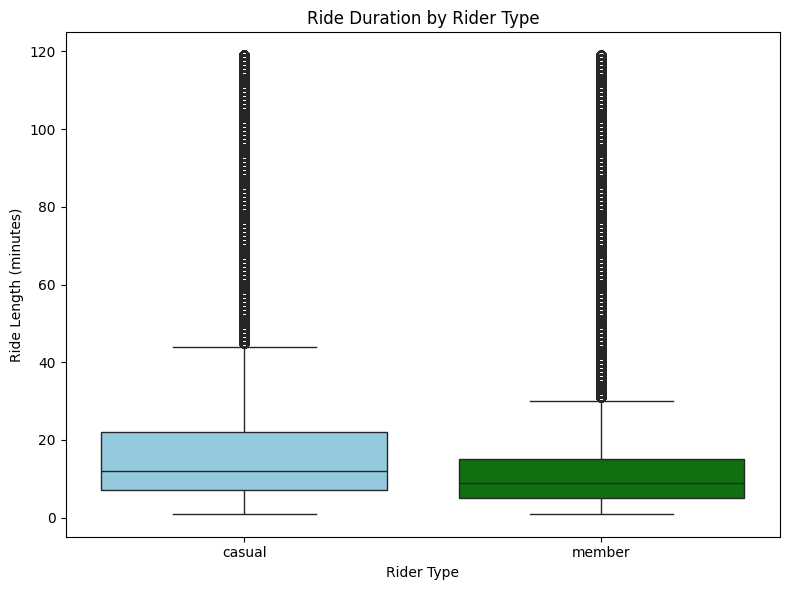

In [28]:
import seaborn as sns

# Optional: Filter out extreme ride lengths (e.g., > 2 hours) to avoid distortion
df_filtered = df[df['ride_length'] < 120]  # in minutes

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, x='member_casual', y='ride_length', palette=['skyblue', 'Green'])
plt.title('Ride Duration by Rider Type')
plt.xlabel('Rider Type')
plt.ylabel('Ride Length (minutes)')
plt.tight_layout()
plt.savefig("/Users/winifred/Downloads/Cyclistic_Bike_Share_Project/visualisation/ride_duration_comparison.png", dpi=300)
plt.show()


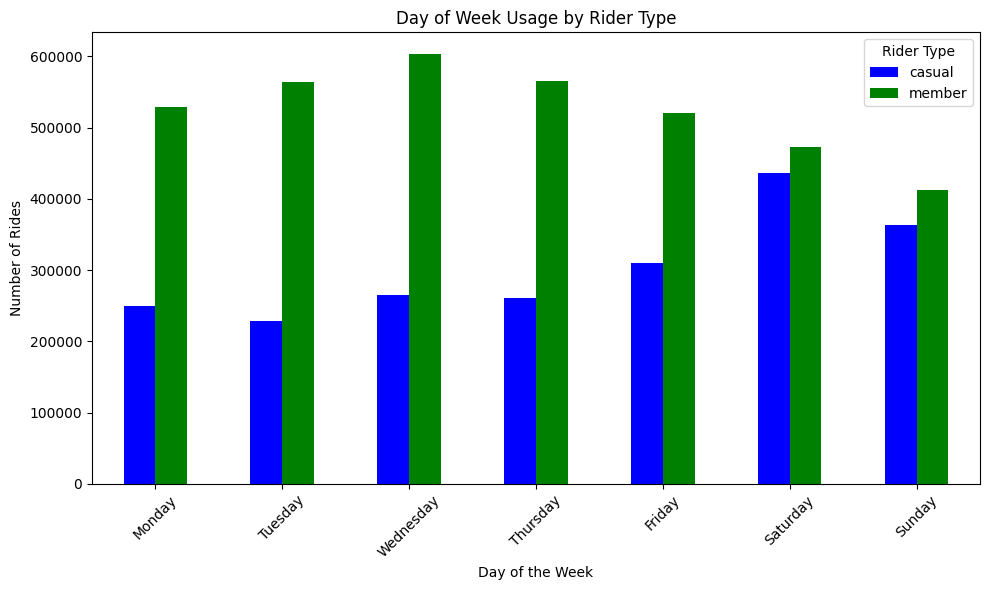

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline



# Group and sort
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = df.groupby(['day_of_week', 'member_casual'], observed=True).size().unstack().reindex(day_order)

# Plot
ax = day_df.plot(kind='bar', figsize=(10, 6), color=['Blue', 'Green'])
plt.title('Day of Week Usage by Rider Type')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Rider Type')
plt.tight_layout()
plt.savefig("/Users/winifred/Downloads/Cyclistic_Bike_Share_Project/visualisation/day_of_week_usage.png", dpi=300)
plt.show()


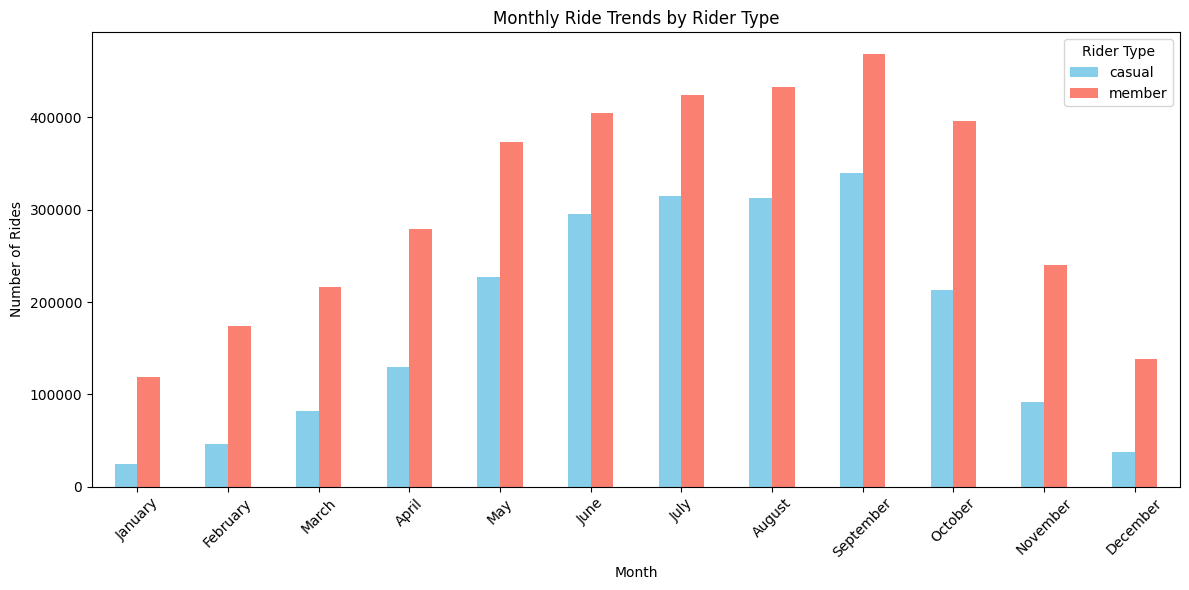

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline




monthly = df.groupby(['ride_month', 'member_casual'], observed=True).size().unstack().fillna(0)

# Drop months with 0 or extremely low rides
monthly = monthly.loc[monthly.sum(axis=1) > 1000]


# Group data by ride_Month and member_casual
monthly = df.groupby(['ride_month', 'member_casual'], observed=True).size().unstack().fillna(0)


# Ensure the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly = monthly.reindex(month_order)

# Plot the data
ax = monthly.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Monthly Ride Trends by Rider Type')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Rider Type')
plt.tight_layout()

# Save the image
plt.savefig("/Users/winifred/Downloads/Cyclistic_Bike_Share_Project/visualisation/monthly_ride_trends.png", dpi=300)

# Show the plot
plt.show()


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779341 entries, 0 to 5779340
Data columns (total 23 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  string        
 5   start_station_id    string        
 6   end_station_name    string        
 7   end_station_id      string        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
 13  ride_length         float64       
 14  ride_date           datetime64[ns]
 15  ride_month          category      
 16  ride_year           int64         
 17  day_of_week         category      
 18  ride_start_time     object        
 19  ride_end_time       object        
 20  ri

In [10]:
# Ensure correct datatypes
df = df.astype({
    'ride_id': 'string',
    'rideable_type': 'category',
    'start_station_name': 'string',
    'start_station_id': 'string',
    'end_station_name': 'string',
    'end_station_id': 'string',
    'member_casual': 'category',
})

# Convert numeric columns
df['ride_length'] = pd.to_numeric(df['ride_length'], errors='coerce')
df['ride_distance_km'] = pd.to_numeric(df['ride_distance_km'], errors='coerce')
df['ride_year'] = pd.to_numeric(df['ride_year'], errors='coerce')

# Convert date/time columns
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')
df['ride_date'] = pd.to_datetime(df['ride_date'], errors='coerce')
df['ride_start_time'] = pd.to_datetime(df['ride_start_time'], errors='coerce').dt.time
df['ride_end_time'] = pd.to_datetime(df['ride_end_time'], errors='coerce').dt.time

# Clean up strings
df['ride_month'] = df['ride_month'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')
df['season'] = df['season'].astype('category')


In [9]:
print(df.dtypes)

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
ride_length                  float64
ride_date             datetime64[ns]
ride_month                    object
ride_year                      int64
day_of_week                   object
ride_start_time       datetime64[ns]
ride_end_time         datetime64[ns]
ride_distance_km             float64
season                        object
bike_type                     object
dtype: object


In [8]:
df['ride_date'] = pd.to_datetime(df['ride_date'], errors='coerce')
df['ride_start_time'] = pd.to_datetime(df['ride_start_time'], format='%H:%M:%S', errors='coerce')
df['ride_end_time'] = pd.to_datetime(df['ride_end_time'], format='%H:%M:%S', errors='coerce')


In [7]:
print(df.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
ride_length           float64
ride_date              object
ride_month             object
ride_year               int64
day_of_week            object
ride_start_time        object
ride_end_time          object
ride_distance_km      float64
season                 object
bike_type              object
dtype: object


I had to review the column headers to ensure the right data type before proceeding. 

In [14]:
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length,ride_date,ride_year,ride_distance_km
count,5779341,5779341,5.779341e+06,5.779341e+06,5.772109e+06,5.772109e+06,5.779341e+06,5779341,5779341.0,5.772109e+06
mean,2024-07-17 09:41:06.489325312,2024-07-17 09:58:40.143581440,4.190215e+01,-8.764618e+01,4.190256e+01,-8.764640e+01,1.756090e+01,2024-07-16 19:09:02.309651712,2024.0,2.181727e+00
min,2024-01-01 00:00:00,2024-01-01 00:04:00,4.164000e+01,-8.791000e+01,1.606000e+01,-1.440500e+02,1.000000e+00,2024-01-01 00:00:00,2024.0,0.000000e+00
25%,2024-05-20 20:12:00,2024-05-20 20:33:00,4.188096e+01,-8.766000e+01,4.188096e+01,-8.766000e+01,6.000000e+00,2024-05-20 00:00:00,2024.0,9.047544e-01
50%,2024-07-23 01:17:00,2024-07-23 02:05:00,4.189705e+01,-8.764182e+01,4.189776e+01,-8.764288e+01,1.000000e+01,2024-07-23 00:00:00,2024.0,1.594556e+00
75%,2024-09-17 23:28:00,2024-09-17 23:47:00,4.193000e+01,-8.762952e+01,4.193000e+01,-8.762954e+01,1.700000e+01,2024-09-17 00:00:00,2024.0,2.823557e+00
max,2024-12-31 23:56:00,2024-12-31 23:59:00,4.207000e+01,-8.752000e+01,8.796000e+01,1.525300e+02,1.560000e+03,2024-12-31 00:00:00,2024.0,5.758135e+03
std,NaN,NaN,4.471101e-02,2.739972e-02,5.609497e-02,1.144114e-01,6.198738e+01,NaN,0.0,5.147782e+00


In [5]:
df.groupby('member_casual')['ride_length'].describe()
df['bike_type'] = df['rideable_type']
df['member_casual'].value_counts()


member_casual
member    3667464
casual    2111877
Name: count, dtype: int64

In [4]:
df = pd.read_csv('/Users/winifred/Downloads/Cyclistic_Bike_Share_Project/Trip_Full_Year_Cleaned/clean_raw_2024_data.csv', low_memory=False)

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,ride_length,ride_date,ride_month,ride_year,day_of_week,ride_start_time,ride_end_time,ride_distance_km,season
0,4422E707103AA4FF,electric_bike,2024-10-14 03:26:00,2024-10-14 03:32:00,NaN,NaN,NaN,NaN,41.96,-87.65,...,member,6.0,2024-10-14,October,2024,Monday,03:26:00,03:32:00,2.771218,Autumn
1,19DB722B44CBE82F,electric_bike,2024-10-13 19:33:00,2024-10-13 19:39:00,NaN,NaN,NaN,NaN,41.98,-87.67,...,member,6.0,2024-10-13,October,2024,Sunday,19:33:00,19:39:00,1.385570,Autumn
2,20AE2509FD68C939,electric_bike,2024-10-13 23:40:00,2024-10-13 23:48:00,NaN,NaN,NaN,NaN,41.97,-87.66,...,member,8.0,2024-10-13,October,2024,Sunday,23:40:00,23:48:00,2.372640,Autumn
3,D0F17580AB9515A9,electric_bike,2024-10-14 02:13:00,2024-10-14 02:25:00,NaN,NaN,NaN,NaN,41.95,-87.65,...,member,12.0,2024-10-14,October,2024,Monday,02:13:00,02:25:00,1.111949,Autumn
4,A114A483941288D1,electric_bike,2024-10-13 19:26:00,2024-10-13 19:28:00,NaN,NaN,NaN,NaN,41.98,-87.67,...,member,2.0,2024-10-13,October,2024,Sunday,19:26:00,19:28:00,0.000000,Autumn


In [1]:
import pandas as pd        
import matplotlib.pyplot as plt  
import seaborn as sns